# Preprocessing

1. There are 2 different types of loans:
    + Cash Loans
    + Revolving Loans
2. Occupation type
    + ~20 different occupation types
3. AMT_ANNUITY
    + log transformation
4. Amount income total
    + Remove outliers 
5. AMT_CREDIT
    + log transformation
6. NAME_EDUCATION_TYPE
    + ~5 education types
7. DAYS_EMPLOYED
    + Remove top outliers
    + Multiply by negative 1 to make positive
    + Bucket
        + < 6 months
        + 6 months - 1 year
        + 1 - 5 years
        + 5 - 10 years
        + 10 - 20 years
        + > 20 years
8. EXT_SOURCE_2
    + Missing less than 1% of the records
    + Already normalized
9. FLAG_OWN_CAR
    + Treat this like a flag if not null
10. REGION_RATING
    + One hot encoding
11. REGION_RATING_W_CITY
    + One hot encoding
12. CNT_FAM_MEMBERS
    + Recode to 1, 2, 3 and >=4
13. OBS_30_CNT_SOCIAL_CIRCLE
    + Recode to 0 or >=1
14. DEF_30_CNT_SOCIAL_CIRCLE
    + Recode to 0 or >=1 
15. OBS_60_CNT_SOCIAL_CIRCLE
    + Recode to - of >= 1
16. DEF_60_CNT_SOCIAL_CIRCLE
    + Recode to 0 or >= 1
17. AMT_REQ_CREDIT_BUREAU_YEAR
    + Recode to 0, 1, 2 or >= 3
18. NAME_INCOME_TYPE
    + One Hot Encoding
19. NAME_FAMILY_STATUS
    + One hot encoding
20. NAME_HOUSING_TYPE
    + One hot encoding
21. REGION_POPULATION_RELATIVE
    + right skewed
22. FLAG_OWN_REALTY


In [10]:
import pandas as pd
import numpy as np
import os, sys
from pathlib import Path

# Add src to path
#sys.path.append(str(Path(__file__).parent.parent))

In [12]:
df = pd.read_csv('./home-credit-default-risk/application_train.csv')
df.shape

(307511, 122)

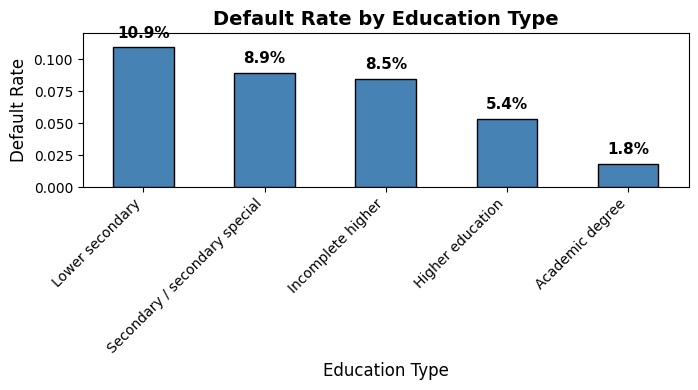


Default Rate by Education Type:
NAME_EDUCATION_TYPE
Lower secondary                  10.93%
Secondary / secondary special     8.94%
Incomplete higher                 8.48%
Higher education                  5.36%
Academic degree                   1.83%
Name: TARGET, dtype: object


<Figure size 640x480 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt


# Fix: Added missing dot before sort_values
default_rates = df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False)

# Create bar chart
fig, ax = plt.subplots(figsize=(7, 4))
default_rates.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')

# Formatting
ax.set_title('Default Rate by Education Type', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Education Type', fontsize=12)
ax.set_ylabel('Default Rate', fontsize=12)
ax.set_ylim(0, default_rates.max() * 1.1)  # Add 10% headroom
ax.grid(False)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of bars
for i, v in enumerate(default_rates):
    ax.text(i, v + 0.005, f'{v:.1%}', ha='center', va='bottom', 
            fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print the results
print("\nDefault Rate by Education Type:")
print(default_rates.apply(lambda x: f'{x:.2%}'))

# Save the plot
plt.savefig('/Users/caseywhorton/ds/homecredit/cohort_profiles/Education_type_default_rates.png', 
            dpi=300, bbox_inches='tight')

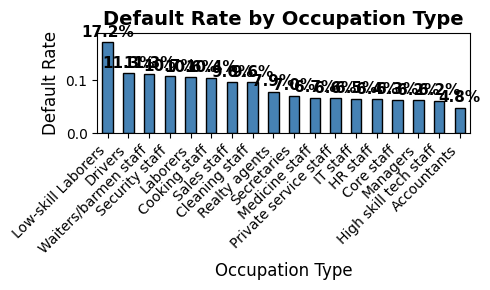


Default Rate by Occupation Type:
OCCUPATION_TYPE
Low-skill Laborers       17.15%
Drivers                  11.33%
Waiters/barmen staff     11.28%
Security staff           10.74%
Laborers                 10.58%
Cooking staff            10.44%
Sales staff               9.63%
Cleaning staff            9.61%
Realty agents             7.86%
Secretaries               7.05%
Medicine staff            6.70%
Private service staff     6.60%
IT staff                  6.46%
HR staff                  6.39%
Core staff                6.30%
Managers                  6.21%
High skill tech staff     6.16%
Accountants               4.83%
Name: TARGET, dtype: object


<Figure size 640x480 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt


# Fix: Added missing dot before sort_values
default_rates = df.groupby('OCCUPATION_TYPE')['TARGET'].mean().sort_values(ascending=False)

# Create bar chart
fig, ax = plt.subplots(figsize=(5, 3))
default_rates.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')

# Formatting
ax.set_title('Default Rate by Occupation Type', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Occupation Type', fontsize=12)
ax.set_ylabel('Default Rate', fontsize=12)
ax.set_ylim(0, default_rates.max() * 1.1)  # Add 10% headroom
ax.grid(False)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of bars
for i, v in enumerate(default_rates):
    ax.text(i, v + 0.005, f'{v:.1%}', ha='center', va='bottom', 
            fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print the results
print("\nDefault Rate by Occupation Type:")
print(default_rates.apply(lambda x: f'{x:.2%}'))

# Save the plot
plt.savefig('/Users/caseywhorton/ds/homecredit/cohort_profiles/Occupation_type_default_rates.png', 
            dpi=300, bbox_inches='tight')

/var/folders/dk/w25w7v256r15pk9pvk88_y780000gn/T/ipykernel_31332/3301122203.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby('AMT_REQ_CREDIT_BUREAU_YEAR_BKT')['TARGET'].mean().sort_values(ascending=False)


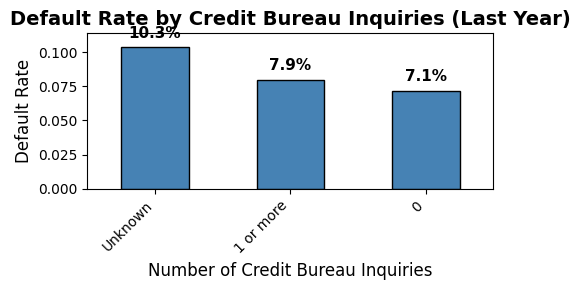


Default Rate by Credit Bureau Inquiries:
AMT_REQ_CREDIT_BUREAU_YEAR_BKT
Unknown      10.34%
1 or more     7.94%
0             7.13%
Name: TARGET, dtype: object


In [59]:
import matplotlib.pyplot as plt

# AMT_REQ_CREDIT_BUREAU_YEAR_BKT
df['AMT_REQ_CREDIT_BUREAU_YEAR_BKT'] = pd.cut(
    df['AMT_REQ_CREDIT_BUREAU_YEAR'],
    bins=[0, 1, float('inf')],
    labels=['0', '1 or more'],
    right=False
)

df['AMT_REQ_CREDIT_BUREAU_YEAR_BKT'] = df['AMT_REQ_CREDIT_BUREAU_YEAR_BKT'].cat.add_categories('Unknown').fillna('Unknown')

# Fix: Added missing dot before sort_values
default_rates = df.groupby('AMT_REQ_CREDIT_BUREAU_YEAR_BKT')['TARGET'].mean().sort_values(ascending=False)

# Create bar chart
fig, ax = plt.subplots(figsize=(5, 3))
default_rates.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')

# Formatting
ax.set_title('Default Rate by Credit Bureau Inquiries (Last Year)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Credit Bureau Inquiries', fontsize=12)
ax.set_ylabel('Default Rate', fontsize=12)
ax.set_ylim(0, default_rates.max() * 1.1)  # Add 10% headroom
ax.grid(False)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of bars
for i, v in enumerate(default_rates):
    ax.text(i, v + 0.005, f'{v:.1%}', ha='center', va='bottom', 
            fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print the results
print("\nDefault Rate by Credit Bureau Inquiries:")
print(default_rates.apply(lambda x: f'{x:.2%}'))

In [52]:

df['YEARS_EMPLOYED'] = abs(df['DAYS_EMPLOYED']) / 365

df['EMPLOYMENT_BKT'] = pd.cut(
    df['YEARS_EMPLOYED'],
    bins=[0, 5, 10, float('inf')],
    labels=['0-5 years', '5-10 years', '10+ years'],
    right=False
)
df['EMPLOYMENT_BKT'] = df['EMPLOYMENT_BKT'].cat.add_categories('Unknown').fillna('Unknown')



/var/folders/dk/w25w7v256r15pk9pvk88_y780000gn/T/ipykernel_31332/1571332559.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby('EMPLOYMENT_BKT')['TARGET'].mean().sort_values(ascending=False)


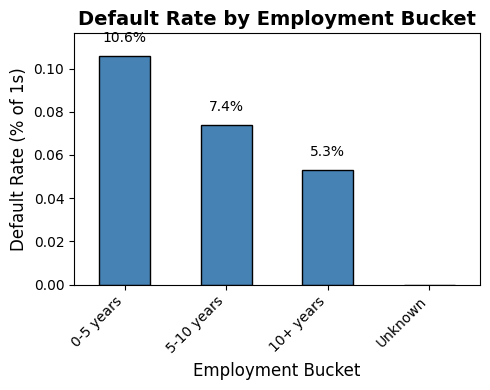


Default Rate by Employment Bucket:
EMPLOYMENT_BKT
0-5 years     10.57%
5-10 years     7.37%
10+ years      5.30%
Unknown         nan%
Name: TARGET, dtype: object


<Figure size 640x480 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt

# Calculate percentage of 1s (default rate) for each employment bucket
default_rates = df.groupby('EMPLOYMENT_BKT')['TARGET'].mean().sort_values(ascending=False)

# Create bar chart
fig, ax = plt.subplots(figsize=(5, 4))
default_rates.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')

# Formatting
ax.set_title('Default Rate by Employment Bucket', fontsize=14, fontweight='bold')
ax.set_xlabel('Employment Bucket', fontsize=12)
ax.set_ylabel('Default Rate (% of 1s)', fontsize=12)
ax.set_ylim(0, max(default_rates) * 1.1)  # Add 10% headroom
ax.grid(False)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of bars
for i, v in enumerate(default_rates):
    ax.text(i, v + 0.005, f'{v:.1%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print the results
print("\nDefault Rate by Employment Bucket:")
print(default_rates.apply(lambda x: f'{x:.2%}'))

# Save the plot
plt.savefig('/Users/caseywhorton/ds/homecredit/cohort_profiles/EMPLOYMENT_BKT_rank_ordering.png', 
            dpi=300, bbox_inches='tight')


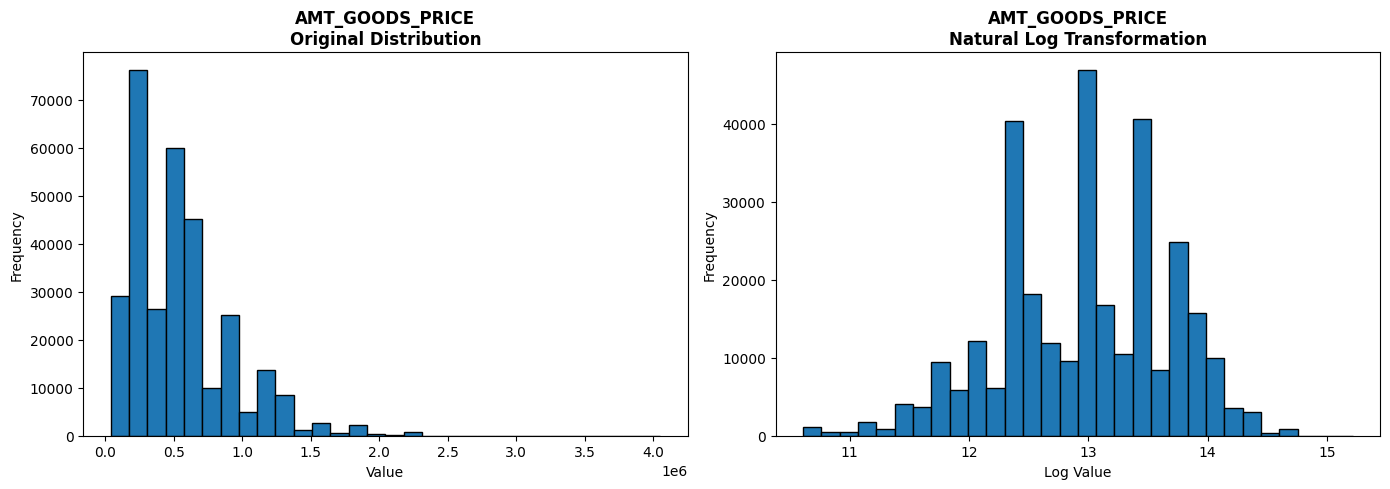

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left subplot - Original distribution
df['AMT_GOODS_PRICE'].hist(ax=axes[0], bins=30, edgecolor='black')
axes[0].set_title('AMT_GOODS_PRICE\nOriginal Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].grid(False)

# Right subplot - Log transformed
np.log(df['AMT_GOODS_PRICE']).hist(ax=axes[1], bins=30, edgecolor='black')
axes[1].set_title('AMT_GOODS_PRICE\nNatural Log Transformation', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Log Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
#plt.savefig('/Users/caseywhorton/ds/homecredit/artifacts/cohort_profiles/amt_goods_price_distribution.png', 
#            dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [331]:
column_set = ['SK_ID_CURR',
'TARGET',
'NAME_CONTRACT_TYPE',
'OCCUPATION_TYPE',
'AMT_ANNUITY',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'NAME_EDUCATION_TYPE',
'DAYS_EMPLOYED',
'EXT_SOURCE_2',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
'CNT_FAM_MEMBERS',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'NAME_INCOME_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'REGION_POPULATION_RELATIVE'
]

numeric_features = ['AMT_ANNUITY',
'AMT_INCOME_TOTAL',
'AMT_CREDIT']

categorical_features = [
    #'OCCUPATION_TYPE',
#'NAME_EDUCATION_TYPE',
#'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
#'REGION_RATING_CLIENT',
#'REGION_RATING_CLIENT_W_CITY',
#'CNT_FAM_MEMBERS_BKT',
#'EMPLOYMENT_BKT',
#'OBS_30_CNT_SOCIAL_CIRCLE_BKT',
#'DEF_30_CNT_SOCIAL_CIRCLE_BKT',
#'OBS_60_CNT_SOCIAL_CIRCLE_BKT',
#'DEF_60_CNT_SOCIAL_CIRCLE_BKT',
'AMT_REQ_CREDIT_BUREAU_YEAR_BKT',
#'NAME_INCOME_TYPE',
#'NAME_FAMILY_STATUS',
#'NAME_HOUSING_TYPE'
]

passthrough_features = ['EXT_SOURCE_2','REGION_POPULATION_RELATIVE']

In [315]:
df['OCCUPATION_TYPE'].isna().sum()

np.int64(96391)

# Bucket Features

Apply transformations as vectors across the entire dataframe.

In [332]:
#OCCUPATION_TYPE
df['OCCUPATION_TYPE'] = df.OCCUPATION_TYPE.fillna("Unknown")

# CNT_FAM_MEMBERS_BKT
df['CNT_FAM_MEMBERS_BKT'] = pd.cut(
    df['CNT_FAM_MEMBERS'],
    bins = [0, 1, 2, 3, 4, float('inf')],
    labels = ['0','1','2','3','4 or more'],
    right=False
)

df['CNT_FAM_MEMBERS_BKT'] = df['CNT_FAM_MEMBERS_BKT'].cat.add_categories('Unknown').fillna('Unknown')

# EMPLOYMENT_BKT
df['YEARS_EMPLOYED'] = abs(df['DAYS_EMPLOYED']) / 365

df['EMPLOYMENT_BKT'] = pd.cut(
    df['YEARS_EMPLOYED'],
    bins=[0, 0.5, 1, 2, 5, 10, 20, 30, float('inf')],
    labels=[
        '< 0.5 years',
        '0.5 - 1 year',
        '1 - 2 years',
        '2 - 5 years',
        '5 - 10 years',
        '10 - 20 years',
        '20 - 30 years',
        '> 30 years'
    ],
    right=False
)
df['EMPLOYMENT_BKT'] = df['EMPLOYMENT_BKT'].cat.add_categories('Unknown').fillna('Unknown')


# OBS_30_CNT_SOCIAL_CIRCLE_BKT
df['OBS_30_CNT_SOCIAL_CIRCLE_BKT'] = pd.cut(
    df['OBS_30_CNT_SOCIAL_CIRCLE'],
    bins = [0, 1, float('inf')],
    labels = ['0', '1 or more'],
    right = False
)

df['OBS_30_CNT_SOCIAL_CIRCLE_BKT'] = df['OBS_30_CNT_SOCIAL_CIRCLE_BKT'].cat.add_categories('Unknown').fillna('Unknown')


# DEF_30_CNT_SOCIAL_CIRCLE_BKT
df['DEF_30_CNT_SOCIAL_CIRCLE_BKT'] = pd.cut(
    df['DEF_30_CNT_SOCIAL_CIRCLE'],
    bins = [0, 1, float('inf')],
    labels = ['0', '1 or more'],
    right = False
)

df['DEF_30_CNT_SOCIAL_CIRCLE_BKT'] = df['DEF_30_CNT_SOCIAL_CIRCLE_BKT'].cat.add_categories('Unknown').fillna('Unknown')


# OBS_60_CNT_SOCIAL_CIRCLE_BKT
df['OBS_60_CNT_SOCIAL_CIRCLE_BKT'] = pd.cut(
    df['OBS_60_CNT_SOCIAL_CIRCLE'],
    bins = [0, 1, float('inf')],
    labels = ['0', '1 or more'],
    right = False
)

df['OBS_60_CNT_SOCIAL_CIRCLE_BKT'] = df['OBS_60_CNT_SOCIAL_CIRCLE_BKT'].cat.add_categories('Unknown').fillna('Unknown')


# DEF_60_CNT_SOCIAL_CIRCLE_BKT
df['DEF_60_CNT_SOCIAL_CIRCLE_BKT'] = pd.cut(
    df['DEF_60_CNT_SOCIAL_CIRCLE'],
    bins = [0, 1, float('inf')],
    labels = ['0', '1 or more'],
    right = False
)

df['DEF_60_CNT_SOCIAL_CIRCLE_BKT'] = df['DEF_60_CNT_SOCIAL_CIRCLE_BKT'].cat.add_categories('Unknown').fillna('Unknown')


# AMT_REQ_CREDIT_BUREAU_YEAR_BKT
df['AMT_REQ_CREDIT_BUREAU_YEAR_BKT'] = pd.cut(
    df['AMT_REQ_CREDIT_BUREAU_YEAR'],
    bins = [0, 1, float('inf')],
    labels = ['0', '1 or more'],
    right = False
)

df['AMT_REQ_CREDIT_BUREAU_YEAR_BKT'] = df['AMT_REQ_CREDIT_BUREAU_YEAR_BKT'].cat.add_categories('Unknown').fillna('Unknown')



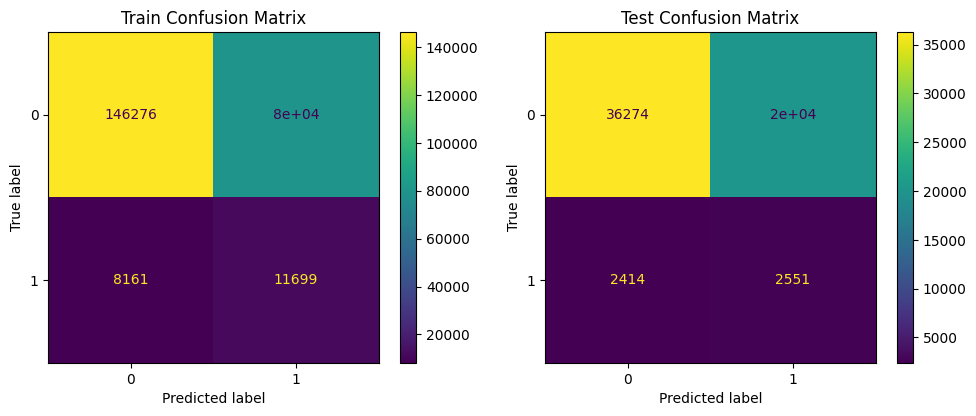


📊 Train Metrics:
Accuracy : 0.642
Precision: 0.128
Recall   : 0.589
F1 Score : 0.210

📊 Test Metrics:
Accuracy : 0.631
Precision: 0.112
Recall   : 0.514
F1 Score : 0.184


In [347]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


#df = df.dropna().reset_index(drop=True)

# Split features and target
X = df.drop(columns=['TARGET'])
y = df['TARGET']
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

rf = RandomForestClassifier(n_estimators = 40,max_depth = 10, class_weight='balanced')


# Full modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',rf)
])

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred),
                       display_labels=model.classes_).plot(ax=ax[0])
ax[0].set_title("Train Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred),
                       display_labels=model.classes_).plot(ax=ax[1])
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()
from sklearn.metrics import accuracy_score, classification_report

# Evaluate
def evaluate(y_true, y_pred, dataset_name):
    print(f"\n📊 {dataset_name} Metrics:")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.3f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.3f}")

evaluate(y_train, y_train_pred, "Train")
evaluate(y_test, y_test_pred, "Test")


🔍 Computing SHAP values...
Number of features after preprocessing: 3
X_test_preprocessed shape: (1000, 3)
shap_values shape: (1000, 3, 2)
shap_values_plot shape after extraction: (1000, 3)

📊 Generating SHAP summary plot...


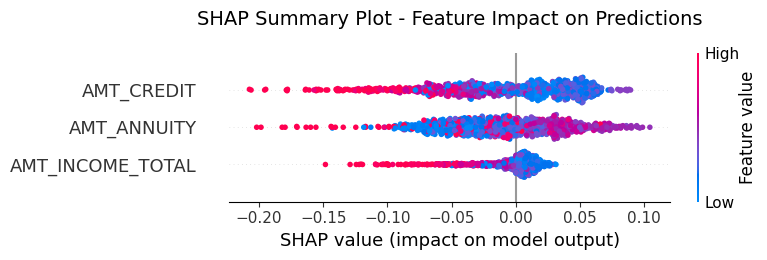


📊 Generating SHAP feature importance plot...


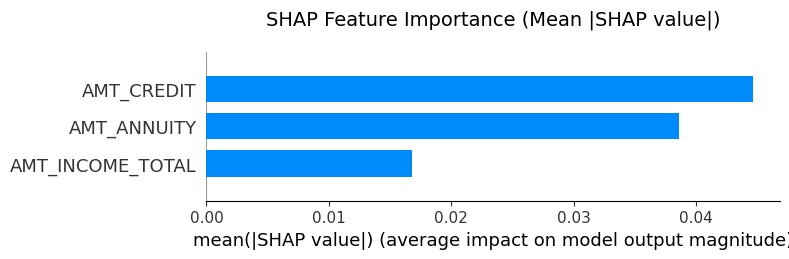


📊 Generating additional SHAP dependence plot...


<Figure size 1000x600 with 0 Axes>

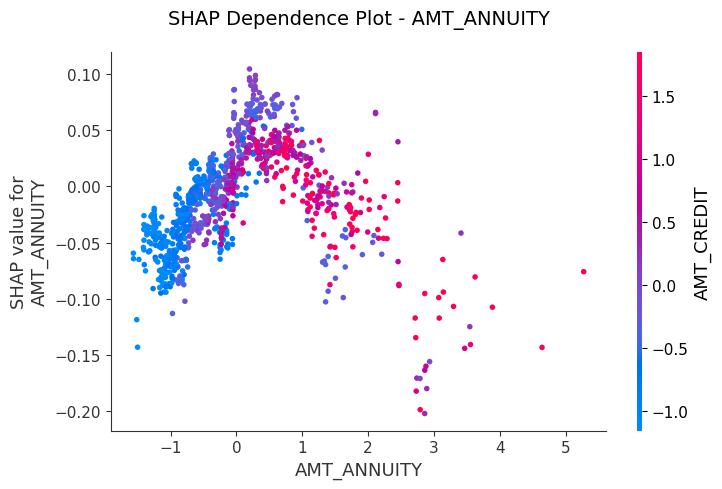


📊 Generating SHAP dependence plot...


<Figure size 1000x600 with 0 Axes>

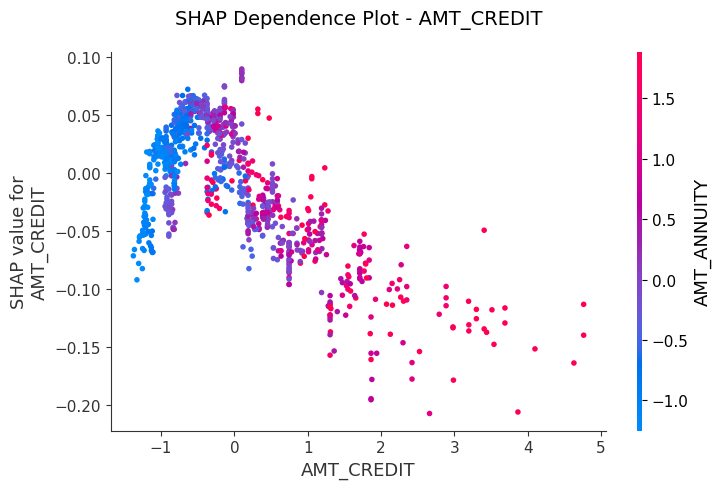


🏆 Top 10 Features by Mean |SHAP value|:
         feature  mean_abs_shap
      AMT_CREDIT       0.044631
     AMT_ANNUITY       0.038593
AMT_INCOME_TOTAL       0.016808


In [385]:
# ========================================
# SHAP Analysis
# ========================================
import shap
import numpy as np

# Initialize SHAP explainer
print("\n🔍 Computing SHAP values...")

# Get the preprocessed training data
X_train_preprocessed = model.named_steps['preprocessor'].transform(X_train)[0:1000]
X_test_preprocessed = model.named_steps['preprocessor'].transform(X_test)[0:1000]

# Get feature names after preprocessing
feature_names = []
for name, transformer, features in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(features)
    elif name == 'cat':
        # Get feature names from OneHotEncoder
        ohe = transformer.named_steps['encoder']
        feature_names.extend(ohe.get_feature_names_out(features))
    elif name == 'passthrough':
        feature_names.extend(features)

print(f"Number of features after preprocessing: {len(feature_names)}")
print(f"X_test_preprocessed shape: {X_test_preprocessed.shape}")

# Create SHAP explainer for the trained classifier
explainer = shap.TreeExplainer(model.named_steps['classifier'])

# Compute SHAP values faor test set
shap_values = explainer.shap_values(X_test_preprocessed)

# Handle the shape: (samples, features, classes) -> (samples, features)
print(f"shap_values shape: {shap_values.shape}")

# For binary classification with shape (samples, features, 2), take class 1 (positive class)
if len(shap_values.shape) == 3:
    shap_values_plot = shap_values[:, :, 1]  # Select positive class across all samples and features
else:
    shap_values_plot = shap_values

print(f"shap_values_plot shape after extraction: {shap_values_plot.shape}")

# ========================================
# SHAP Visualizations
# ========================================

# 1. Summary Plot (beeswarm) - shows feature importance and impact
print("\n📊 Generating SHAP summary plot...")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_plot, X_test_preprocessed, 
                  feature_names=feature_names, show=False)
plt.title("SHAP Summary Plot - Feature Impact on Predictions", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# 2. Bar Plot - mean absolute SHAP values (feature importance)
print("\n📊 Generating SHAP feature importance plot...")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_plot, X_test_preprocessed, 
                  feature_names=feature_names, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean |SHAP value|)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


# 4. Additional Dependence Plot - second most important feature
print("\n📊 Generating additional SHAP dependence plot...")

# Get second most important feature
mean_abs_shap = np.abs(shap_values_plot).mean(axis=0)
top_features_idx = np.argsort(mean_abs_shap)[::-1]

if len(top_features_idx) > 1:
    second_feature_idx = top_features_idx[1]
    second_feature_name = feature_names[second_feature_idx]
    
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(
        second_feature_idx,
        shap_values_plot,
        X_test_preprocessed,
        feature_names=feature_names,
        show=False
    )
    plt.title(f"SHAP Dependence Plot - {second_feature_name}", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

# 5. Dependence Plot - shows interaction between top feature and others
print("\n📊 Generating SHAP dependence plot...")
# Find the feature with highest mean absolute SHAP value
mean_abs_shap = np.abs(shap_values_plot).mean(axis=0)
top_feature_idx = np.argmax(mean_abs_shap)
top_feature_name = feature_names[top_feature_idx]

plt.figure(figsize=(10, 6))
shap.dependence_plot(
    top_feature_idx,
    shap_values_plot,
    X_test_preprocessed,
    feature_names=feature_names,
    show=False
)
plt.title(f"SHAP Dependence Plot - {top_feature_name}", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Save Preprocessor Artifact

In [388]:
import joblib
import os

# Assume your preprocessor is already fitted
# e.g., preprocessor.fit(df)

# Ensure the artifacts directory exists
os.makedirs("../artifacts", exist_ok=True)

# Define the path
transformer_path = "../artifacts/preprocessor.pkl"

# Save (serialize) the fitted transformer
joblib.dump(preprocessor, transformer_path)

print(f"✅ Transformer saved to {transformer_path}")

✅ Transformer saved to ../artifacts/preprocessor.pkl


# Save Model Artifact

In [389]:
import joblib
import os

# ensure the artifact directory exists
os.makedirs("../artifacts", exist_ok=True)

# Define the path
model_path = "../artifacts/model_classifier.pkl"

# Save (serialize) the model
joblib.dump(rf, model_path)

print(f"Model saved to {model_path}")

Model saved to ../artifacts/model_classifier.pkl


In [ ]:
# Days employed
import pandas as pd

# Convert DAYS_EMPLOYED to absolute years
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs() / 365

# Define new bins and labels
bins = [0, 0.5, 1, 2, 5, 10, 20, 30, float('inf')]
labels = [
    '< 0.5 years',
    '0.5 - 1 year',
    '1 - 2 years',
    '2 - 5 years',
    '5 - 10 years',
    '10 - 20 years',
    '20 - 30 years',
    '> 30 years'
]

# Create employment bucket column
df['EMPLOYMENT_BUCKET'] = pd.cut(df['YEARS_EMPLOYED'], bins=bins, labels=labels, right=False)

# Count TARGET values per bucket
bucket_counts = df.groupby(['EMPLOYMENT_BUCKET', 'TARGET']).size().unstack(fill_value=0)

# Add total column
bucket_counts['TOTAL'] = bucket_counts.sum(axis=1)

# Calculate TARGET = 1 rate
bucket_counts['TARGET_1_RATE'] = bucket_counts[1] / bucket_counts['TOTAL']

# Optional: format as percentage
bucket_counts['TARGET_1_RATE_PCT'] = (bucket_counts['TARGET_1_RATE'] * 100).round(2)

print(bucket_counts)



In [83]:
#df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()
# Define new bins and labels
bins = [0, 1, 2, 3, float('inf')]
labels = [
    '0',
    '1',
    '2',
    '3',
]

# Create employment bucket column
df['OBS_BUCKET'] = pd.cut(df['AMT_REQ_CREDIT_BUREAU_YEAR'], bins=bins, labels=labels, right=False)
# Count TARGET values per bucket
bucket_counts = df.groupby(['OBS_BUCKET', 'TARGET']).size().unstack(fill_value=0)
bucket_counts['TOTAL'] = bucket_counts.sum(axis=1)
bucket_counts['TARGET_1_RATE'] = bucket_counts[1] / bucket_counts['TOTAL']

bucket_counts['TARGET_1_RATE_PCT'] = (bucket_counts['TARGET_1_RATE'] * 100).round(2)

bucket_counts

/var/folders/dk/w25w7v256r15pk9pvk88_y780000gn/T/ipykernel_81088/4023069895.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_counts = df.groupby(['OBS_BUCKET', 'TARGET']).size().unstack(fill_value=0)


TARGET,0,1,TOTAL,TARGET_1_RATE,TARGET_1_RATE_PCT
OBS_BUCKET,,,,,
0,66678,5123,71801,0.071350,7.13
1,58755,4650,63405,0.073338,7.33
2,46124,4068,50192,0.081049,8.10
3,73902,6692,80594,0.083033,8.30


In [43]:
#df['EXT_SOURCE_1'].isna().sum()/len(df)
df['EXT_SOURCE_2'].isna().sum()/len(df)
#df['EXT_SOURCE_3'].isna().sum()/len(df)

np.float64(0.0021462646864665006)

In [29]:
df['OWN_CAR_AGE'].notna().sum() 
df['OWN_CAR_AGE'].isna().sum()

np.int64(202929)

In [54]:
import pandas as pd

# Convert DAYS_EMPLOYED to absolute years
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs() / 365

# Define new bins and labels
bins = [0, 0.5, 1, 2, 5, 10, 20, 30, float('inf')]
labels = [
    '< 0.5 years',
    '0.5 - 1 year',
    '1 - 2 years',
    '2 - 5 years',
    '5 - 10 years',
    '10 - 20 years',
    '20 - 30 years',
    '> 30 years'
]

# Create employment bucket column
df['EMPLOYMENT_BUCKET'] = pd.cut(df['YEARS_EMPLOYED'], bins=bins, labels=labels, right=False)

# Count TARGET values per bucket
bucket_counts = df.groupby(['EMPLOYMENT_BUCKET', 'TARGET']).size().unstack(fill_value=0)

# Add total column
bucket_counts['TOTAL'] = bucket_counts.sum(axis=1)

# Calculate TARGET = 1 rate
bucket_counts['TARGET_1_RATE'] = bucket_counts[1] / bucket_counts['TOTAL']

# Optional: format as percentage
bucket_counts['TARGET_1_RATE_PCT'] = (bucket_counts['TARGET_1_RATE'] * 100).round(2)

print(bucket_counts)


TARGET                 0     1  TOTAL  TARGET_1_RATE  TARGET_1_RATE_PCT
EMPLOYMENT_BUCKET                                                      
< 0.5 years         8718  1034   9752       0.106030              10.60
0.5 - 1 year       16121  2031  18152       0.111888              11.19
1 - 2 years        28210  3631  31841       0.114035              11.40
2 - 5 years        68813  7709  76522       0.100742              10.07
5 - 10 years       60105  4785  64890       0.073740               7.37
10 - 20 years      36303  2119  38422       0.055151               5.52
20 - 30 years       9123   429   9552       0.044912               4.49
> 30 years         55293  3087  58380       0.052878               5.29


/var/folders/dk/w25w7v256r15pk9pvk88_y780000gn/T/ipykernel_30112/3670023734.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_counts = df.groupby(['EMPLOYMENT_BUCKET', 'TARGET']).size().unstack(fill_value=0)


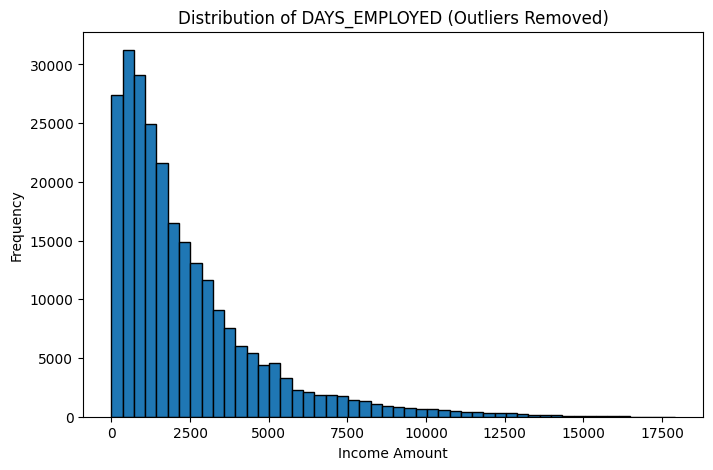

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate IQR
Q1 = df['DAYS_EMPLOYED'].quantile(0.25)
Q3 = df['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['DAYS_EMPLOYED'] <= upper_bound)]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist((df_filtered['DAYS_EMPLOYED'])*-1, bins=50, edgecolor='black')

plt.title('Distribution of DAYS_EMPLOYED (Outliers Removed)')
plt.xlabel('Income Amount')
plt.ylabel('Frequency')

plt.show()


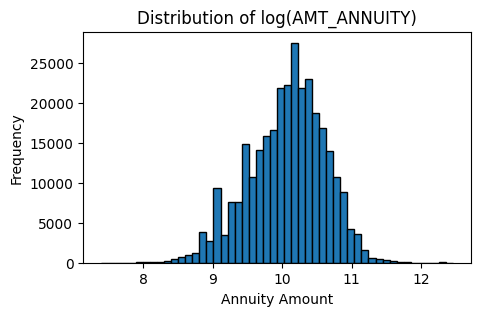

In [42]:
import matplotlib.pyplot as plt
import pandas as pd


# Plot histogram
plt.figure(figsize=(5, 3))
plt.hist(np.log(df['AMT_ANNUITY']), bins=50, edgecolor='black')

plt.title('Distribution of log(AMT_ANNUITY)')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

plt.show()


In [37]:
df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Plot histogram
plt.figure(figsize=(5, 3))
plt.hist(np.log(df['AMT_ANNUITY']), bins=50, edgecolor='black')

plt.title('Distribution of log(AMT_ANNUITY)')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

plt.show()


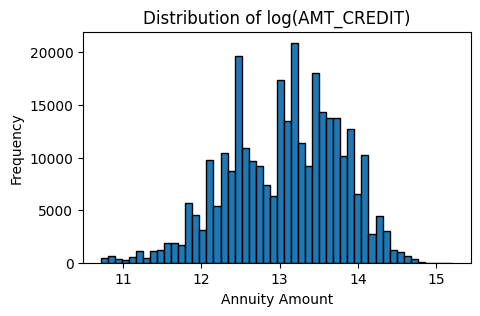

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot histogram
plt.figure(figsize=(5, 3))
plt.hist(np.log(df['AMT_CREDIT']), bins=50, edgecolor='black')

plt.title('Distribution of log(AMT_CREDIT)')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

plt.show()


In [34]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

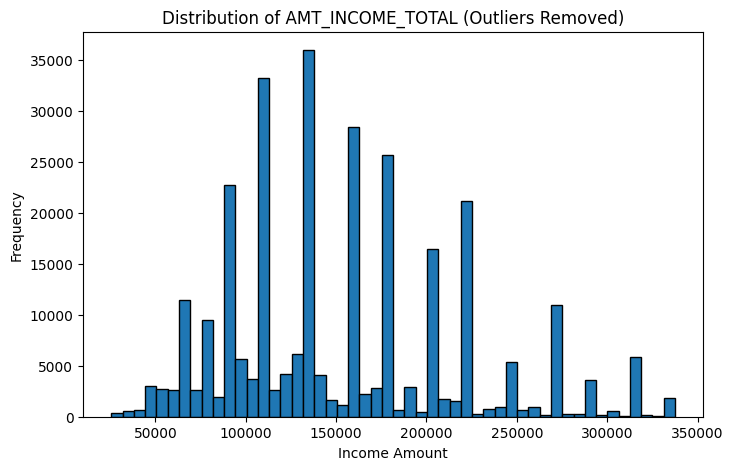

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate IQR
Q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['AMT_INCOME_TOTAL'] >= lower_bound) & (df['AMT_INCOME_TOTAL'] <= upper_bound)]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df_filtered['AMT_INCOME_TOTAL'], bins=50, edgecolor='black')

plt.title('Distribution of AMT_INCOME_TOTAL (Outliers Removed)')
plt.xlabel('Income Amount')
plt.ylabel('Frequency')

plt.show()


In [17]:
sums= df[['NAME_CONTRACT_TYPE','TARGET']].value_counts().reset_index().groupby("TARGET")["count"].transform("sum")

_df = df[['NAME_CONTRACT_TYPE','TARGET']].value_counts().reset_index()

_df['ratio_within_target'] = _df['count']/sums
# Compute total count per TARGET
#totals = df.groupby("TARGET")["count"].transform("sum")
_df
# Compute ratio within each TARGET group
#df["ratio_within_target"] = df["count"] / totals


,NAME_CONTRACT_TYPE,TARGET,count,ratio_within_target
0,Cash loans,0,255011,0.902100
1,Revolving loans,0,27675,0.097900
2,Cash loans,1,23221,0.935388
3,Revolving loans,1,1604,0.064612


In [19]:
sums= df[['NAME_CONTRACT_TYPE','TARGET']].value_counts().reset_index().groupby("NAME_CONTRACT_TYPE")["count"].transform("sum")

_df = df[['NAME_CONTRACT_TYPE','TARGET']].value_counts().reset_index()

_df['ratio_within_contract'] = _df['count']/sums
# Compute total count per TARGET
#totals = df.groupby("TARGET")["count"].transform("sum")
_df.sort_values('NAME_CONTRACT_TYPE')
# Compute ratio within each TARGET group
#df["ratio_within_target"] = df["count"] / totals


,NAME_CONTRACT_TYPE,TARGET,count,ratio_within_contract
0,Cash loans,0,255011,0.916541
2,Cash loans,1,23221,0.083459
1,Revolving loans,0,27675,0.945217
3,Revolving loans,1,1604,0.054783
